# 01_baseline

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper")   

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import warnings
warnings.simplefilter('ignore')


import statistics
import math
from random import random
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

# Preparation

In [2]:
d_train = pd.read_csv('dev_rsc/train.csv')
d_test = pd.read_csv('dev_rsc/test.csv')
data_cleaner = [d_train, d_test]

data1_cat = list(d_train.columns)
data1_cat_w = data1_cat[:]

data1_cat_noncat = ["LotArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
                    "LowQualFinSF","GrLivArea","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch",
                    "3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YearBuilt", "YearRemodAdd", "YrSold"]
data1_cat.remove("Id")

for x in data1_cat_w:
    if x in data1_cat_noncat:
        data1_cat.remove(x)

# Varabile of interest

## TotalSF

Text(0, 0.5, 'SalePrice')

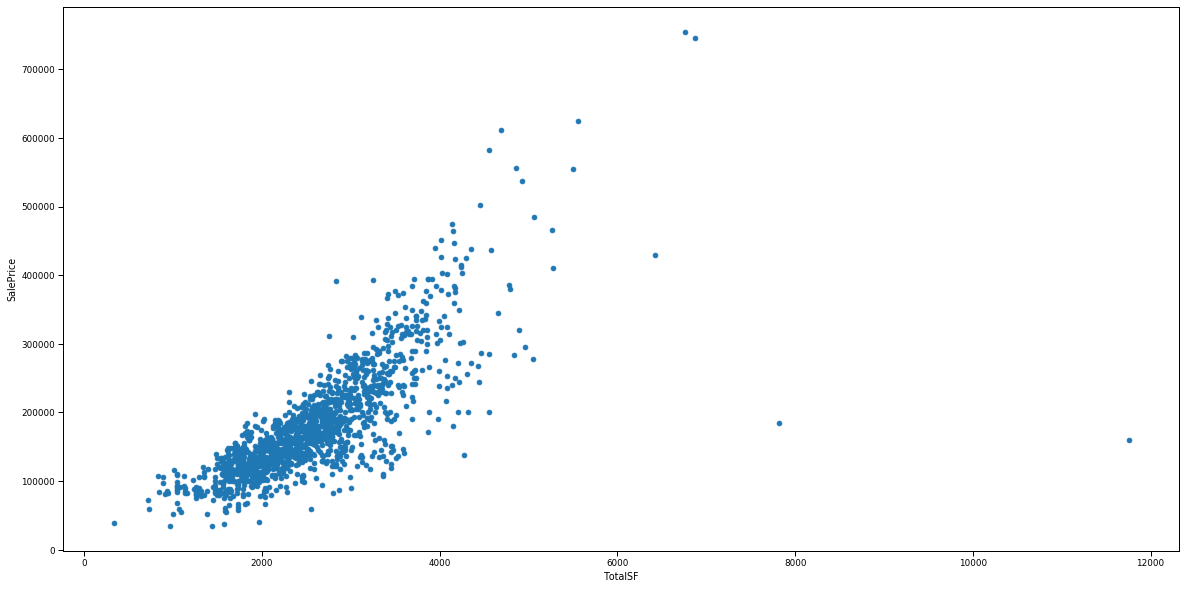

In [3]:
d_train["TotalSF"] = d_train["1stFlrSF"] + d_train["2ndFlrSF"] + d_train["TotalBsmtSF"]
d_test["TotalSF"] = d_test["1stFlrSF"] + d_test["2ndFlrSF"] + d_test["TotalBsmtSF"]

#物件の広さと物件価格の散布図を作成
plt.figure(figsize=(20, 10))
plt.scatter(d_train["TotalSF"],d_train["SalePrice"])
plt.xlabel("TotalSF")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

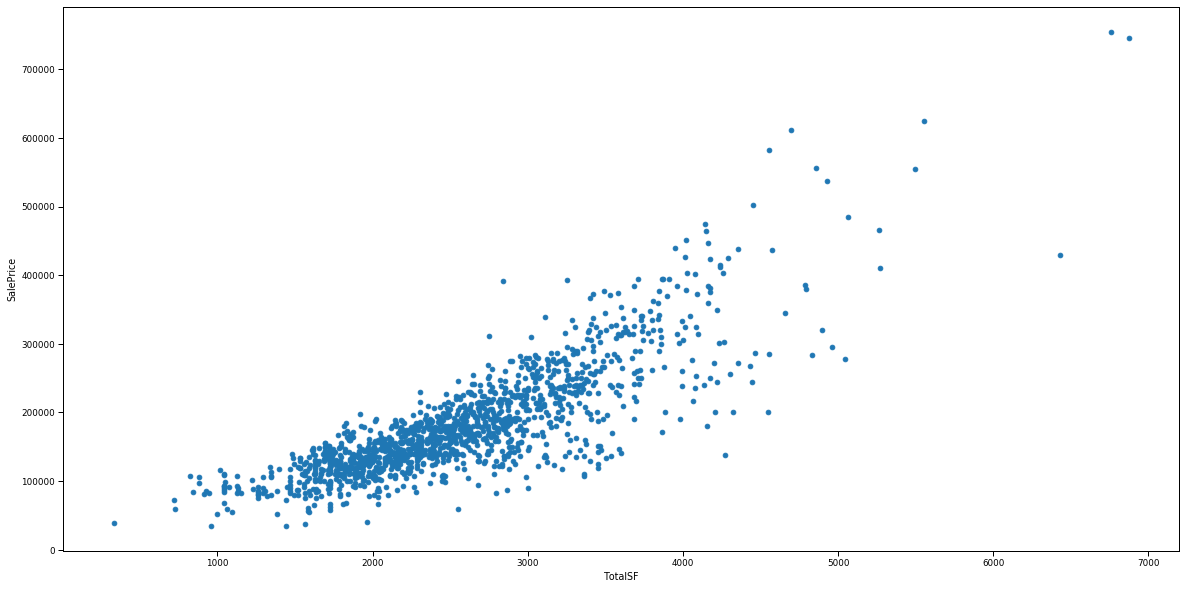

In [4]:
#外れ値を除外する
d_train = d_train.drop(d_train[(d_train['TotalSF']>7500) & (d_train['SalePrice']<300000)].index)

#物件の広さと物件価格の散布図を作成
plt.figure(figsize=(20, 10))
plt.scatter(d_train["TotalSF"],d_train["SalePrice"])
plt.xlabel("TotalSF")
plt.ylabel("SalePrice")

## YearBuilt

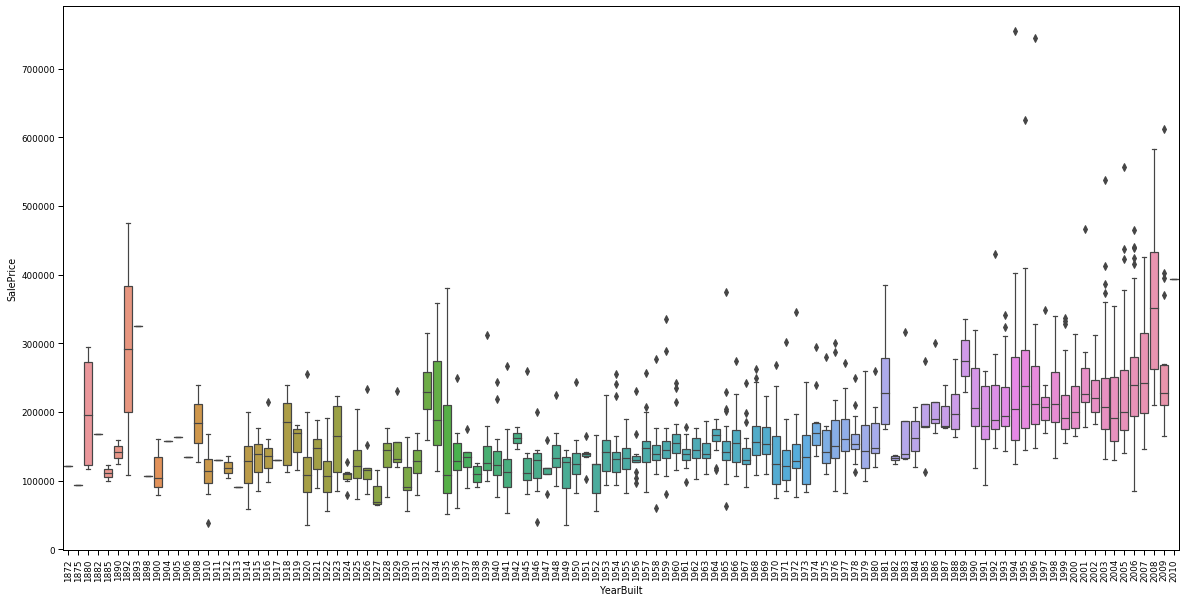

In [5]:
data = pd.concat([d_train["YearBuilt"],d_train["SalePrice"]],axis=1)

plt.figure(figsize=(20, 10))
plt.xticks(rotation='90')
sns.boxplot(x="YearBuilt",y="SalePrice",data=data)

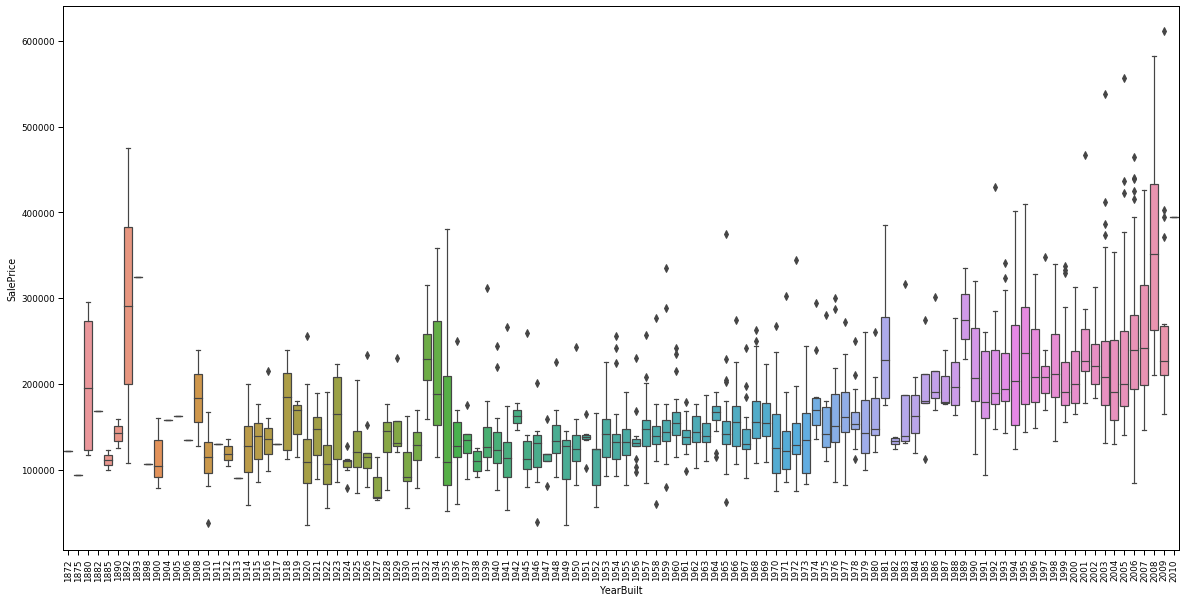

In [6]:
#外れ値を除外する
d_train = d_train.drop(d_train[(d_train['YearBuilt']<2000) & (d_train['SalePrice']>600000)].index)

#グラフを描画する
data = pd.concat([d_train["YearBuilt"],d_train["SalePrice"]],axis=1)

plt.figure(figsize=(20, 10))
plt.xticks(rotation='90')
sns.boxplot(x="YearBuilt",y="SalePrice",data=data)

## GrLivArea

Text(0, 0.5, 'SalePrice')

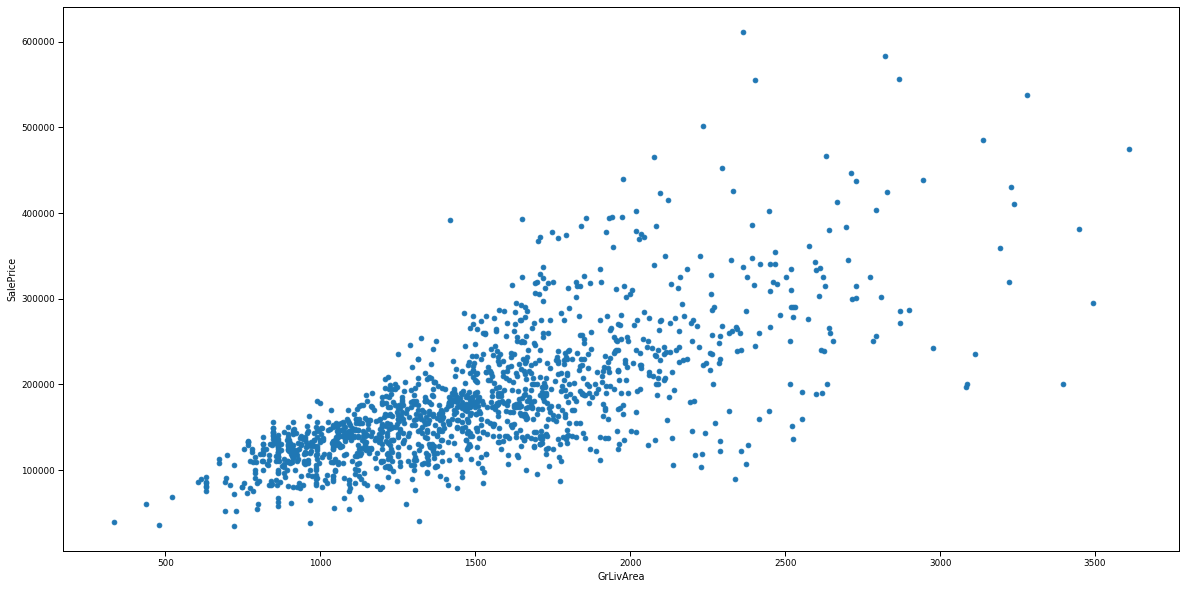

In [7]:
# 散布図を作成
plt.figure(figsize=(20, 10))
plt.scatter(d_train["GrLivArea"],d_train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

## GarageCars --- これは使わない

Text(0, 0.5, 'SalePrice')

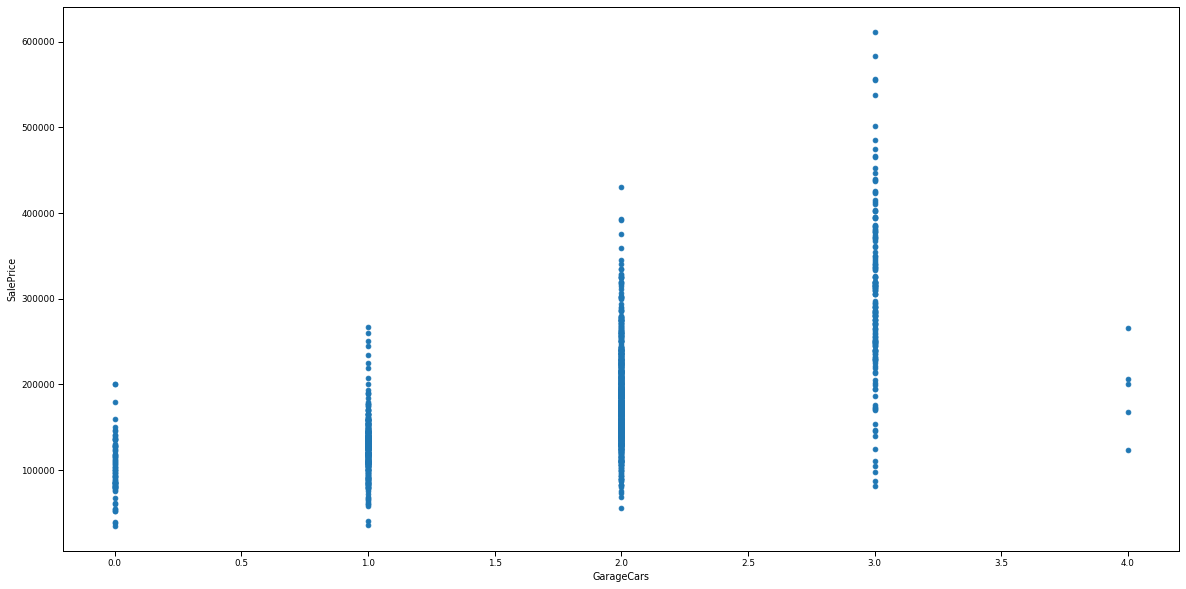

In [8]:
# 散布図を作成
plt.figure(figsize=(20, 10))
plt.scatter(d_train["GarageCars"],d_train["SalePrice"])
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

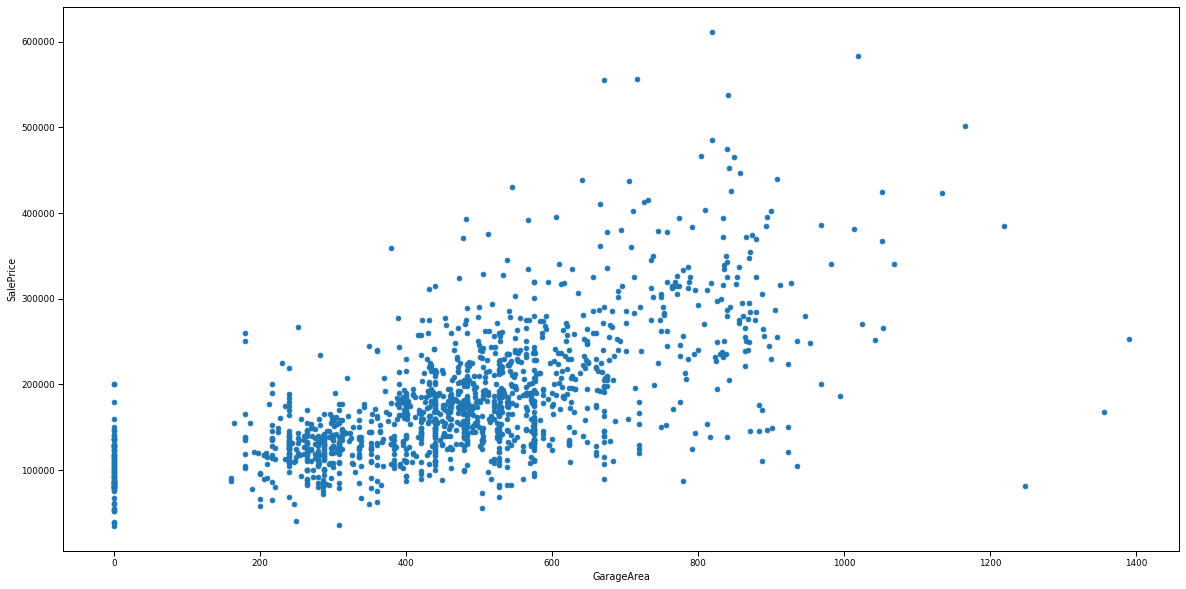

In [9]:
# 散布図を作成
plt.figure(figsize=(20, 10))
plt.scatter(d_train["GarageArea"],d_train["SalePrice"])
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

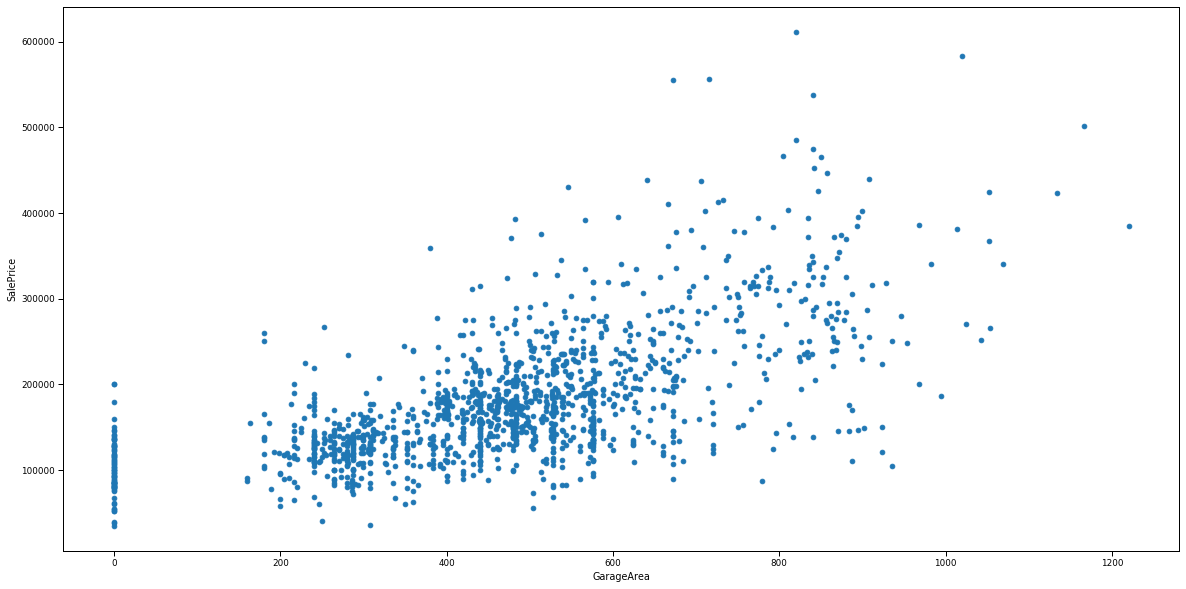

In [10]:
d_train = d_train.drop(d_train[(1200<d_train['GarageArea']) & (d_train['SalePrice']<300000)].index)
plt.figure(figsize=(20, 10))
plt.scatter(d_train["GarageArea"],d_train["SalePrice"])
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")

# データマージ

In [11]:
d_train_x = d_train.drop("SalePrice",axis=1)
d_train_y = d_train["SalePrice"]

all_data = pd.concat([d_train_x,d_test],axis=0,sort=True)


#IDのカラムは不必要なので別の変数に格納
#d_train_ID = d_train['Id']
#d_test_ID = d_test_x['Id']

#all_data.drop("Id", axis = 1, inplace = True)

#それぞれのデータのサイズを確認
print("d_train_x: "+str(d_train_x.shape))
print("d_train_y: "+str(d_train_y.shape))
print("d_tess: "+str(d_test.shape))
print("all_data: "+str(all_data.shape))

d_train_x: (1452, 81)
d_train_y: (1452,)
d_tess: (1459, 81)
all_data: (2911, 81)


# 欠損値保管

In [13]:
na_col_list = all_data.isnull().sum()[all_data.isnull().sum()>0].index.tolist()

#隣接した道路の長さ（LotFrontage）の欠損値の補完
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#欠損値が存在するかつfloat型のリストを作成
float_list = all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "float64"].index.tolist()

#欠損値が存在するかつobject型のリストを作成
obj_list = all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "object"].index.tolist()

#float型の場合は欠損値を0で置換
all_data[float_list] = all_data[float_list].fillna(0)

#object型の場合は欠損値を"None"で置換
all_data[obj_list] = all_data[obj_list].fillna("None")

#欠損値が全て置換できているか確認
print(all_data.isnull().sum()[all_data.isnull().sum() > 0])

Series([], dtype: int64)


# カテゴリ変数に変換する

In [14]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [15]:
d_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343


# 目的変数の対数化

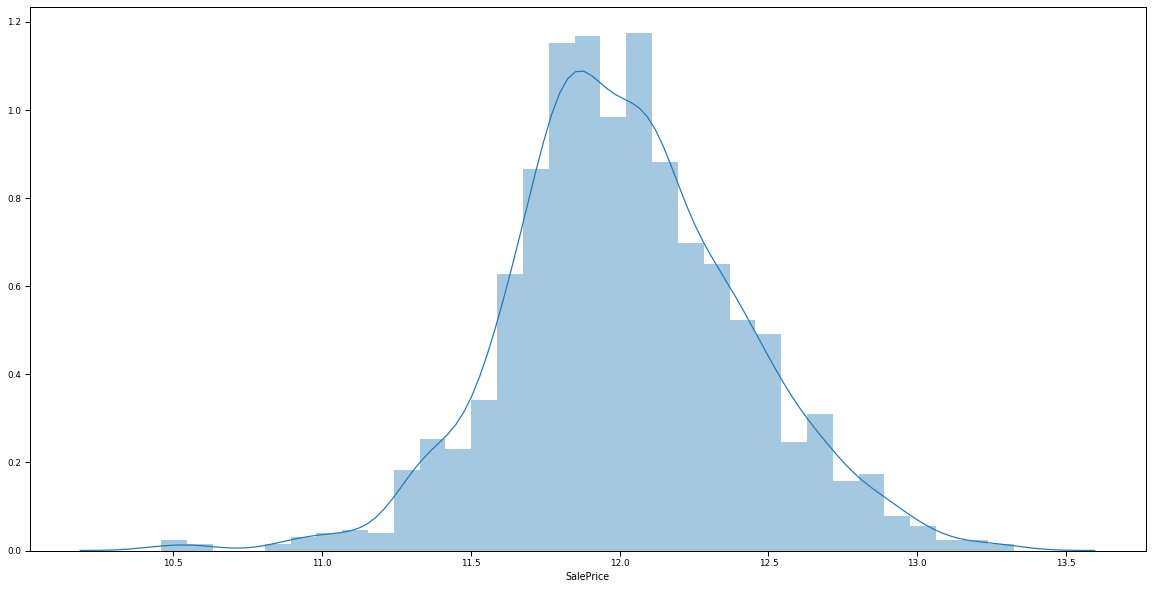

In [17]:
#目的変数の対数log(x+1)をとる
d_train_y = np.log1p(d_train_y)

#分布を可視化
plt.figure(figsize=(20, 10))
sns.distplot(d_train_y)

# 説明変数の対数変換

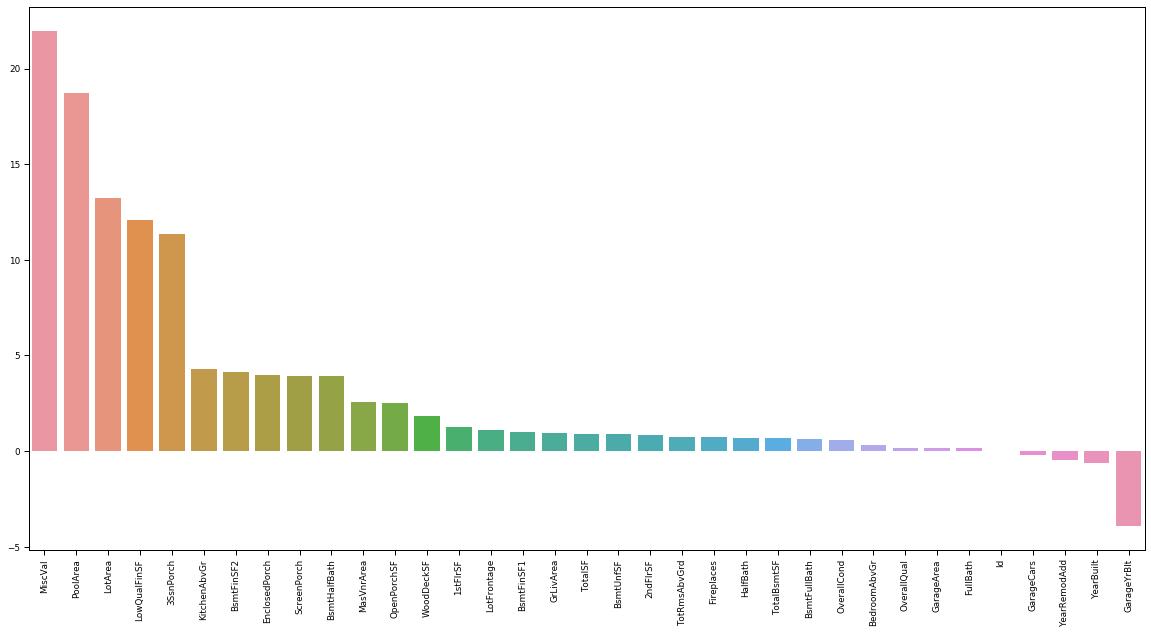

In [19]:
#数値の説明変数のリストを作成
num_feats = all_data.dtypes[all_data.dtypes != "object" ].index

#各説明変数の歪度を計算
skewed_feats = all_data[num_feats].apply(lambda x: x.skew()).sort_values(ascending = False)

#グラフ化
plt.figure(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x=skewed_feats.index, y=skewed_feats)

In [20]:
#歪度の絶対値が0.5より大きい変数だけに絞る
skewed_feats_over = skewed_feats[abs(skewed_feats) > 0.5].index

#各変数の最小値を表示

s=min([min(all_data[i]) for i in skewed_feats_over])
print("minimum data : ", s)

minimum data :  0


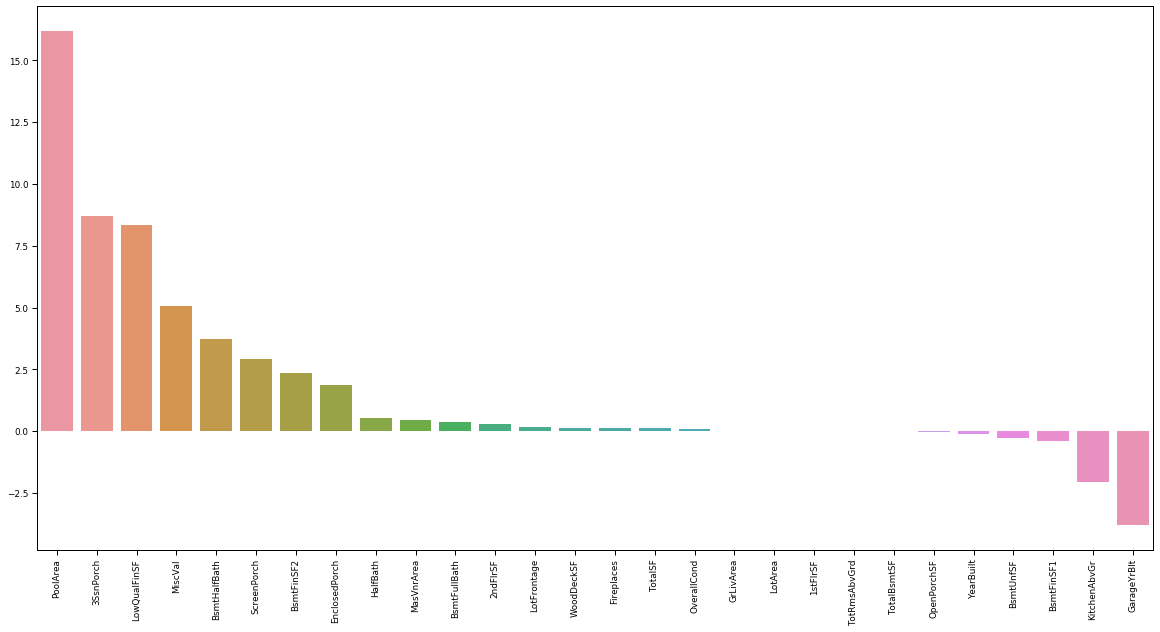

In [21]:
#Yeo-Johnson変換
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(all_data[skewed_feats_over])

#変換後のデータで各列を置換
all_data[skewed_feats_over] = pt.transform(all_data[skewed_feats_over])

#各説明変数の歪度を計算
skewed_feats_fixed = all_data[skewed_feats_over].apply(lambda x: x.skew()).sort_values(ascending = False)

#グラフ化
plt.figure(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x=skewed_feats_fixed.index, y=skewed_feats_fixed)

# 新しい特徴量の追加

In [22]:
#特徴量に1部屋あたりの面積を追加
all_data["FeetPerRoom"] =  all_data["TotalSF"]/all_data["TotRmsAbvGrd"]

#その他有効そうなものを追加する

#建築した年とリフォームした年の合計
all_data['YearBuiltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']

#バスルームの合計面積
all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

#縁側の合計面積
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

#プールの有無
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

#2階の有無
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

#ガレージの有無
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

#地下室の有無
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

#暖炉の有無
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# 学習データに存在せず、テストデータのみに存在するカテゴリ変数の確認

In [49]:
#カテゴリ変数となっているカラムを取り出す
cal_list = all_data.dtypes[all_data.dtypes=="object"].index.tolist()
#学習データにおけるカテゴリ変数のデータ数を確認
import io
buffer = io.StringIO()
d_train_x[cal_list].info(buf=buffer)
df_info = buffer.getvalue().split("\n")
for a in df_info[5:-3]:
    t=a.split()
    if int(t[2])==0: print(t)

# カテゴリ変数のエンコーディング

In [51]:
#カテゴリ変数をget_dummiesによるone-hot-encodingを行う
all_data = pd.get_dummies(all_data,columns=cal_list)

#サイズを確認
all_data.shape

(2911, 350)

# データの保管

In [54]:
#学習データとテストデータに再分割
d_train_x = all_data.iloc[:d_train_x.shape[0],:].reset_index(drop=True)
d_test_x = all_data.iloc[d_train_x.shape[0]:,:].reset_index(drop=True)

#サイズを確認
print("d_train_x: "+str(d_train_x.shape))
print("d_test_x: "+str(d_test_x.shape))

# csvに保管
d_train_x.to_csv('./dev_rsc/d_train_x.csv')
d_train_y.to_csv('./dev_rsc/d_train_y.csv')
d_test_x.to_csv('./dev_rsc/d_test_x.csv')

d_train_x: (1452, 350)
d_test_x: (1459, 350)


In [55]:
d_train_x

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0.0,1.184930,-0.113464,3,0.807406,-0.367877,1.170011,-0.252137,-0.868669,-0.432656,...,0,1,1,0,0,0,0,1,0,0
1,0.0,-0.864118,-0.113464,3,1.021156,-0.367877,-0.840240,3.966092,-0.415342,-0.432656,...,0,1,1,0,0,0,1,0,0,0
2,0.0,1.187512,-0.113464,3,0.581225,-0.367877,1.170011,-0.252137,-0.029563,-0.432656,...,0,1,1,0,0,0,0,1,0,0
3,0.0,1.162172,-0.113464,3,0.151711,-0.367877,1.170011,-0.252137,0.201309,2.317300,...,0,1,1,0,0,1,0,0,0,0
4,0.0,1.223178,-0.113464,4,0.760432,-0.367877,1.170011,-0.252137,0.095728,-0.432656,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.0,1.145972,-0.113464,3,-1.353371,-0.367877,-0.840240,-0.252137,0.924818,-0.432656,...,0,1,1,0,0,0,1,0,0,0
1448,0.0,-0.864118,-0.113464,3,0.879356,2.718806,1.170011,-0.252137,0.299851,-0.432656,...,0,1,1,0,0,0,0,0,0,1
1449,0.0,1.239258,-0.113464,4,0.271383,-0.367877,-0.840240,-0.252137,0.806565,-0.432656,...,0,1,1,0,0,0,0,0,0,1
1450,0.0,-0.864118,-0.113464,2,-0.452832,2.720500,1.170011,-0.252137,-2.052874,2.313208,...,0,1,1,0,0,0,0,0,0,1
